In [1]:
# ===============================
# House Price Prediction-EDA
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load data
df = pd.read_csv("../data/house_price.csv")
df.head()


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
drop_cols = ['id', 'Date']
for col in drop_cols:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)
# Fix renovation year (row-wise)
df.loc[df['Renovation Year'] == 0, 'Renovation Year'] = df['Built Year']
# Feature engineering
CURRENT_YEAR = 2024
df['house_age'] = CURRENT_YEAR - df['Built Year']
df['years_since_renovation'] = CURRENT_YEAR - df['Renovation Year']
# Drop original year columns
df.drop(columns=['Built Year', 'Renovation Year'], inplace=True)

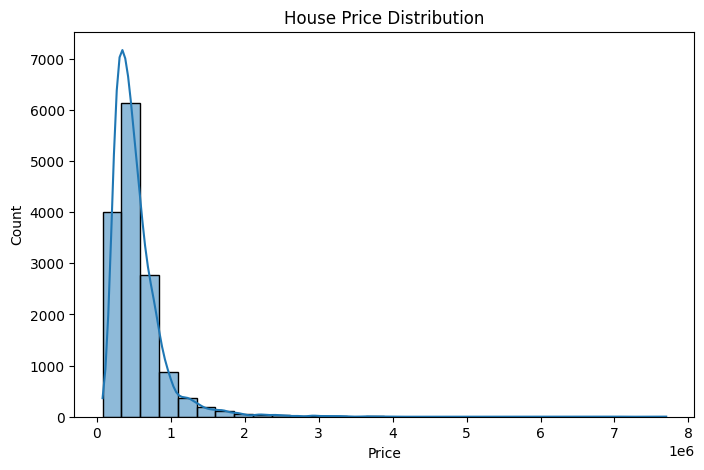

In [5]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("House Price Distribution")
plt.show()


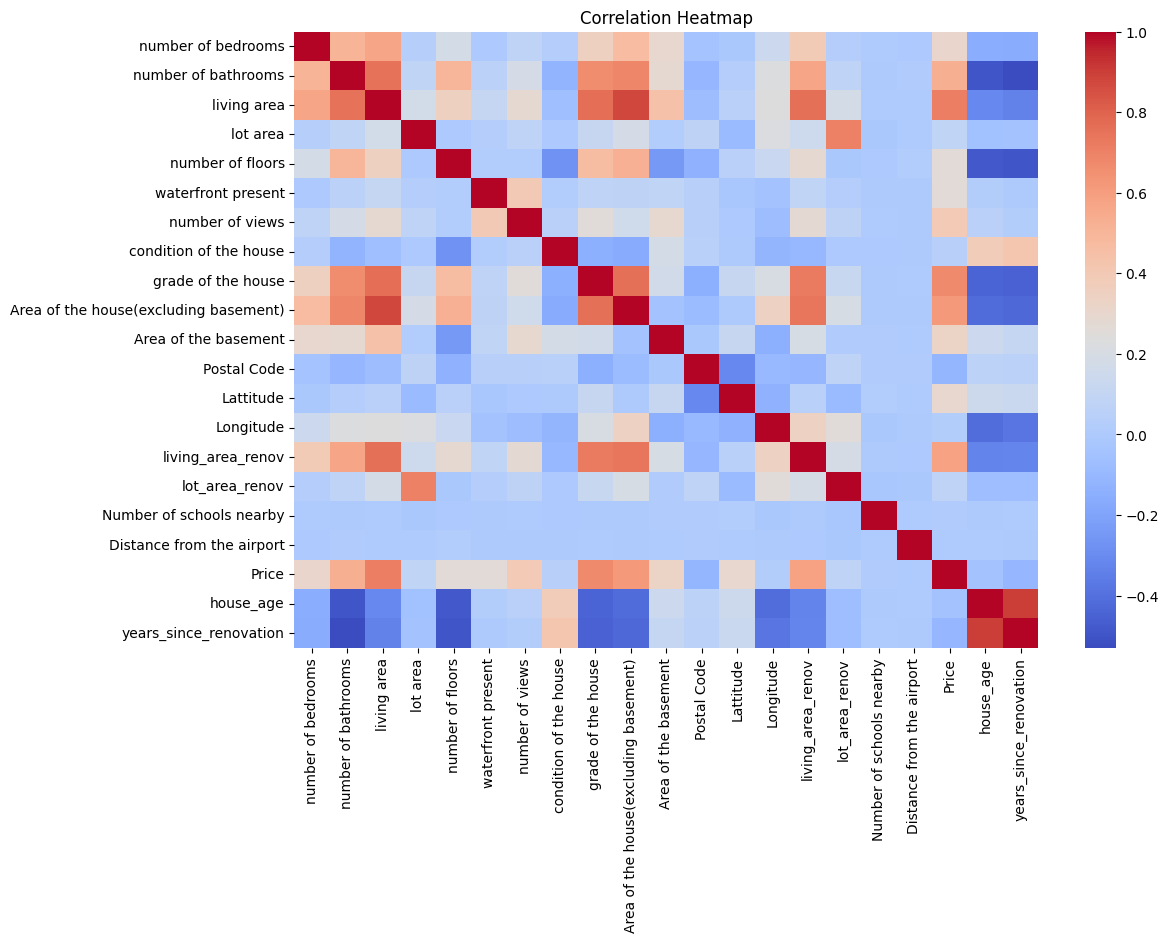

In [6]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [7]:
# Train-test split
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R2:", r2_score(y_test, lr_pred))


Linear Regression
MAE: 125452.61685768208
RMSE: 209947.28911601048
R2: 0.7021686877663176


In [13]:
# Random Forest
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=4,
    min_samples_leaf=1,
    max_features=0.7,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2:", r2_score(y_test, rf_pred))


Random Forest
MAE: 68830.4753061302
RMSE: 132049.64781370104
R2: 0.882178565279781


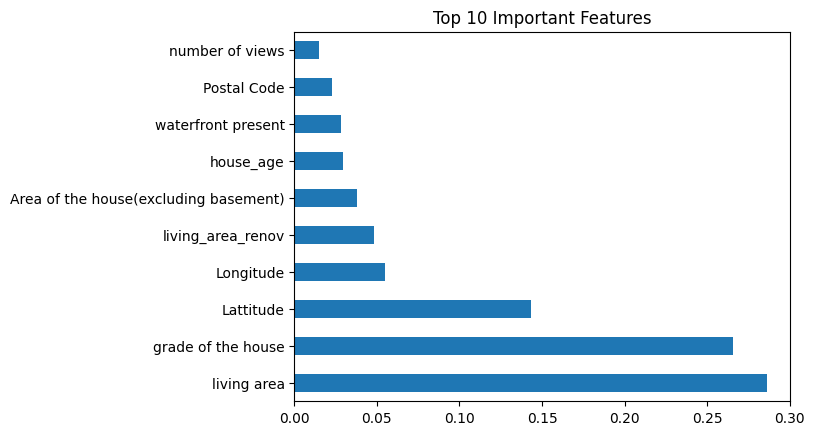

In [14]:
# Feature importance
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
